# Analyse K562 P2 R9 run from 20204/09/27

In [1]:

from dimelo import parse_bam, plot_enrichment_profile, plot_reads
import matplotlib.pyplot as plt
from pathlib import Path
     

modkit found with expected version 0.2.4


In [2]:
! ls "/home/michalula/data/cas9_nanopore/data/2024927_Cas9_R9_promethion_K562"


bams_pass_merged.bam	 to_hg19  to_k562_spr30588077  to_t2t_v1_1
post_seq_basecall_align  to_hg38  to_t2t_v1_0	       trim_bam_pass_merged.bam


In [3]:
! ls "/home/michalula/data/cas9_nanopore/data/2024927_Cas9_R9_promethion_K562/to_t2t_v1_1"

aligned_T2Tv1_1_trim_bam_pass_merged.bam
more_mismatches
sort_aligned_T2Tv1_1_trim_bam_pass_merged.bam
sort_aligned_T2Tv1_1_trim_bam_pass_merged.bam.bai
summary_aligned_T2Tv1_1_trim_bam_pass_merged.tsv


### System Information
Run this cell to list system information about your machine

In [4]:
import platform
print('System:',platform.system())
print('Release:',platform.release())
print('Version:',platform.version())
print('Processor:',platform.processor())

#  Pyton version
import sys
print(sys.version)
     

System: Linux
Release: 6.8.0-45-generic
Version: #45~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Sep 11 15:25:05 UTC 2
Processor: x86_64
3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]


In [5]:
from pathlib import Path
from matplotlib import pyplot as plt
import pysam
import pandas as pd
from dimelo import plot_enrichment_profile, load_processed, parse_bam, utils

import seaborn as sns
from matplotlib.axes import Axes
import matplotlib.pyplot as plt

import numpy as np


#### Download & Use the T2T v.1.1 -> for my Cas9 runs

! mkdir ./test/output/
!wget https://s3-us-west-2.amazonaws.com/human-pangenomics/T2T/CHM13/assemblies/chm13.draft_v1.1.fasta.gz -O ./test/output/chm13.draft_v1.1.fasta.gz
!gunzip ./test/output/chm13.draft_v1.1.fasta.gz
     
--2024-04-17 15:37:02--  https://s3-us-west-2.amazonaws.com/human-pangenomics/T2T/CHM13/assemblies/chm13.draft_v1.1.fasta.gz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.238.208, 52.218.235.48, 52.92.131.176, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.238.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 892637258 (851M) [binary/octet-stream]
Saving to: ‘./test/output/chm13.draft_v1.1.fasta.gz’

./test/output/chm13 100%[===================>] 851.29M  39.5MB/s    in 22s     

2024-04-17 15:37:24 (39.5 MB/s) - ‘./test/output/chm13.draft_v1.1.fasta.gz’ saved [892637258/892637258]


!pwd
     
/content/dimelo

In [6]:
from pathlib import Path
ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta') #'./test/output/chm13.draft_v1.1.fasta')
ref_genome_v1_1_file

PosixPath('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')

In [7]:
# from matplotlib import pyplot as plt
# t2t_cd55 = 'chr1:206586162-206586192'
# # hg38_cd55 = 'chr1:207320867-207320897'

# # caspileup = '/Users/oberondixon-luinenburg/Documents/Ioannidis-Streets/dimelo_test_data/cd55_cas9/cd55_tss/pileup.sorted.bed.gz'
# # caspileup = '/content/drive/MyDrive/Michal Rozenwald/data/CD55/cas9_12ef_101923_misha/dimelo_new_package/cd55_tss_pileup_ws4000/pileup.sorted.bed.gz' # pileup
# # T_bedgz = Path('/content/drive/MyDrive/Michal Rozenwald/data/ENCODE/T_primary_ENCSR663MXB/ENCFF355UVU.m.sorted.bed.gz') #'/Users/oberondixon-luinenburg/Downloads/ENCFF279HCL.m.sorted.bed.gz')
# K562_bedgz = Path('/content/drive/MyDrive/Michal Rozenwald/data/ENCODE/T_primary_ENCSR663MXB/ENCFF355UVU.m.sorted.bed.gz') #'/Users/oberondixon-luinenburg/Downloads/ENCFF279HCL.m.sorted.bed.gz')

# from dimelo import plot_enrichment_profile
# from dimelo import load_processed
# import pysam

# fig, ax = plt.subplots()

# for file,region in zip([caspileup,T_bedgz],[t2t_cd55,hg38_cd55]):
#     mod_counts_vector,val_counts_vector = load_processed.pileup_vectors_from_bedmethyl(
#         bedmethyl_file = file,
#         motif = 'CG,0',
#         regions = region,
#         window_size = None
#     )
#     pileup_frac = mod_counts_vector / val_counts_vector
#     ax.plot(pileup_frac,'*',label=Path(file).name)

# plt.title(f'Region-of-interest near CD55 between bisulfite data and nanopore cas9 data\nT2T:{t2t_cd55}, hg38:{hg38_cd55}')
# plt.xlabel('relative genomic coordinate')
# # plt.legend()
# plt.subplots_adjust(bottom=0.5)  # Adjust the bottom
# # Placing the legend at the bottom outside of the figure
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)

# seq = pysam.FastaFile(ref_genome_v1_1_file).fetch('chr1',206586162,206586192)
# print(seq)
# seq_list =  [s for s in seq]
# plt.xticks(range(len(seq_list)), seq_list, size='small')

In [8]:
# from matplotlib import pyplot as plt
# t2t_cd55 = 'chr1:206586162-206586192'
# hg38_cd55 = 'chr1:207320867-207320897'

# # caspileup = '/Users/oberondixon-luinenburg/Documents/Ioannidis-Streets/dimelo_test_data/cd55_cas9/cd55_tss/pileup.sorted.bed.gz'
# caspileup = '/content/drive/MyDrive/Michal Rozenwald/data/CD55/cas9_12ef_101923_misha/dimelo_new_package/cd55_tss_pileup_ws4000/pileup.sorted.bed.gz' # pileup
# T_bedgz = Path('/content/drive/MyDrive/Michal Rozenwald/data/ENCODE/T_primary_ENCSR663MXB/ENCFF355UVU.m.sorted.bed.gz') #'/Users/oberondixon-luinenburg/Downloads/ENCFF279HCL.m.sorted.bed.gz')

# from dimelo import plot_enrichment_profile
# from dimelo import load_processed
# import pysam

# fig, ax = plt.subplots()

# for file,region in zip([caspileup,T_bedgz],[t2t_cd55,hg38_cd55]):
#     mod_counts_vector,val_counts_vector = load_processed.pileup_vectors_from_bedmethyl(
#         bedmethyl_file = file,
#         motif = 'CG,0',
#         regions = region,
#         window_size = None
#     )
#     pileup_frac = mod_counts_vector / val_counts_vector
#     ax.plot(pileup_frac,'*',label=Path(file).name)

# plt.title(f'Region-of-interest near CD55 between bisulfite data and nanopore cas9 data\nT2T:{t2t_cd55}, hg38:{hg38_cd55}')
# plt.xlabel('relative genomic coordinate')
# # plt.legend()
# plt.subplots_adjust(bottom=0.5)  # Adjust the bottom
# # Placing the legend at the bottom outside of the figure
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)

# seq = pysam.FastaFile(ref_genome_v1_1_file).fetch('chr1',206586162,206586192)
# print(seq)
# seq_list =  [s for s in seq]
# plt.xticks(range(len(seq_list)), seq_list, size='small')

In [9]:
bam_cas9_12ef_101923 = "/home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.bam"
bam_cas9_12ef_101923

'/home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.bam'

In [10]:
# !modkit update-tags \
#  /home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.bam \
#  /home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.updated.bam \
#  --mode ambiguous

> done, 244270 records processed, 0 failed, 44 skipped                          


In [17]:
# ! samtools index /home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.updated.bam 

In [10]:

bam_cas9_12ef_101923_updated = Path("/home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.updated.bam")
# "/content/drive/MyDrive/Michal Rozenwald/data/CD55/cas9_12ef_101923_misha/mc_only/cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.updated.bam")
output_dir = Path("/home/michalula/code/epiCausality/K562/dimelo_new_output")
# Path('/content/drive/MyDrive/Michal Rozenwald/data/CD55/cas9_12ef_101923_misha/dimelo_new_package') # './test/output')

output_dir.mkdir(exist_ok=True)
output_dir
     

PosixPath('/home/michalula/code/epiCausality/K562/dimelo_new_output')

In [11]:
output_dir,bam_cas9_12ef_101923_updated

(PosixPath('/home/michalula/code/epiCausality/K562/dimelo_new_output'),
 PosixPath('/home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.updated.bam'))

In [34]:
! head /home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.updated.bam

�$��t�� �J)_�FX�A�����	�����3���r�&`)Jw��Ll%�3AB�ETD�D鐐�4��K� �}f�/��o�������\���1���Eo�Rļ�׊�IҎͰ[˕�׽j��Yo��R)��9��`}�\h�#��{�K$��q
C��}c���t��Bqθ�L�����o�+|+�$yf.�
5�\���MH�2JKw*��(E�H�S��EHf��3;l/���!��6b�L�LZ�H�Z�aA�������DP�R�g���bRi�6���aA�jn��A+�y���jA�H�r�W���"z�r�:W^]��+��R�Dۍ��ZI��*E����V���^+
���n�ՙ)ԓ�V���p����6Î	�a3i%�ڠD�824�uH���r��v�
}O<��z�I�a��hnu�ݭEA�$͝;��0�?n�fg�$�̈́�Fc���:�s 0 ���짓ǆ�����T{�'FD0L����w�Rp���$|�>�HI����ixv81"�~O�@����p06;�|^:K	��䫣)��p*��a����Cp���$��������S�p��#>��}=5O/�H�oK��֡����m�w       � BC � �}�o�U׹ｙyo�3�ڳ�Pam�B�f:����l7�ڤJ����D�M
�C%�;+�b)!�(�E!Cb�J"���)h4$b�-�����3�|����?�z>�7�{����k�����������ˆw<�,_&__��ey�K���	���׼�uO?������=�~�cO���'{�uO>��SO����>�կ}�'ߵ���K������ٺV[�VV�um�}�3{�n��{;��,5���jvx[+8Ki\M�p]�\[�a��+����Eb��P'�
X�Mk�V�KA������Ŭ�k��F3A��l��hQлU̮4om����m����J[��q�k4�*���;zC^�I����U_0�o;w�i�k�����2�(�5��ƭ(zԷޒ��V�Y�M6!�ν�

In [13]:
# using domelo modkit_parsing_main :
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# # t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'

# # using domelo modkit_parsing_main:
# pileup_file = parse_bam.pileup(
#     input_file=bam_cas9_12ef_101923_updated, #ctcf_bam_file,
#     output_name='cas9_12ef_101923_main_extract_30bps_chr1_206586162_206586192_wsNone_thresh190', #'ctcf_demo_pileup',
#     ref_genome=ref_genome_v1_1_file, # ref_genome_file,
#     output_directory=output_dir,
#     region_str=t2t_v1_1_cd55_30bps, # bed_files= [ctcf_target_regions],
#     basemods=['CG,0'],
#     thresh=190,
#     window_size=None,
#     # window_size=1000,
#     # cores=None,
#     # cleanup=False
# )

# using domelo modkit_parsing_beta :


In [14]:
# using domelo modkit_parsing_beta :
t2t_cd55_30bps = 'chr1:206586162-206586192'

extract_file, extract_regions = parse_bam.extract(
    input_file=bam_cas9_12ef_101923_updated, # ctcf_bam_file_updated
    output_name='cas9_12ef_101923_extract_30bps_chr1_206586162_206586192_wsNone_thresh190', # _ws4000 'ctcf_demo_extract',
    ref_genome=ref_genome_v1_1_file, # ref_genome_file,
    output_directory=output_dir,
    regions=t2t_cd55_30bps, # [cd55_interest_target_regions], # ctcf_target_regions,ctcf_off_target_regions],
    motifs=['CG,0'], # ['A,0','CG,0'],
    thresh=190,
    window_size=None,

    # cores = 1, # uncomment this line if your process appears to be terminating early (reduces memory usage)
    # quiet = True,
    # cleanup = False,
    # log=True,
)

Indexing chm13.draft_v1.1.fasta. This only needs to be done once.
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 190 assumed to be for range 0-255. 190/255=0.7450980392156863 will be sent to modkit.


          | Preprocessing   0% | 00:00

          | Processing cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.updated.bam   0% | 00:00<?

          |    0%

          | Transferring 920 from reads.CG,0.txt into reads.combined_basemods.h5, new size 920   0% | 00:00<?

In [15]:
read_data_list, datasets, _ = load_processed.read_vectors_from_hdf5(
    file=extract_file, # extract_file_no_thresh, # raw modification probabilities
    regions=t2t_cd55_30bps, # cd55_30bps_interest_coords, # ctcf_target_regions,
    motifs=['CG,0'], # 'A,0'],
    window_size=None,
)
# Print out the data from the first read
for idx,dataset in enumerate(datasets):
    print(dataset)
    for read_data in read_data_list:
        print('\t',read_data[idx])
        break
     

chromosome
	 chr1
mod_vector
	 [False False False ... False False  True]
motif
	 CG,0
read_end
	 206590113
read_name
	 9343e1fe-dfbc-4434-b969-95a0ee2bd0f2
read_start
	 206583052
strand
	 +
val_vector
	 [False False False ...  True False  True]
region_start
	 206586162
region_end
	 206586192
CG,0_mod_fraction
	 0.5


In [16]:
read_data_list


[('chr1',
  array([False, False, False, ..., False, False,  True]),
  'CG,0',
  np.int32(206590113),
  '9343e1fe-dfbc-4434-b969-95a0ee2bd0f2',
  np.int32(206583052),
  '+',
  array([False, False, False, ...,  True, False,  True]),
  206586162,
  206586192,
  np.float64(0.5)),
 ('chr1',
  array([False, False, False, ..., False, False, False]),
  'CG,0',
  np.int32(206589926),
  'b69854bc-ff64-4b07-bf2e-b05edf6385ba',
  np.int32(206583052),
  '+',
  array([False, False, False, ...,  True, False,  True]),
  206586162,
  206586192,
  np.float64(0.1)),
 ('chr1',
  array([False, False, False, ..., False, False, False]),
  'CG,0',
  np.int32(206589931),
  '4a9708df-dfb6-4e6f-8795-a6f3e697e947',
  np.int32(206583052),
  '+',
  array([False, False, False, ...,  True, False,  True]),
  206586162,
  206586192,
  np.float64(0.3)),
 ('chr1',
  array([False, False, False, ..., False, False, False]),
  'CG,0',
  np.int32(206589933),
  '51a762b4-5376-49f0-8d2d-32fe9a21236f',
  np.int32(206583052),
  '

In [17]:
read_data_list[0][1] #['mod_vector']

array([False, False, False, ..., False, False,  True])

AttributeError: 'Legend' object has no attribute 'legendHandles'

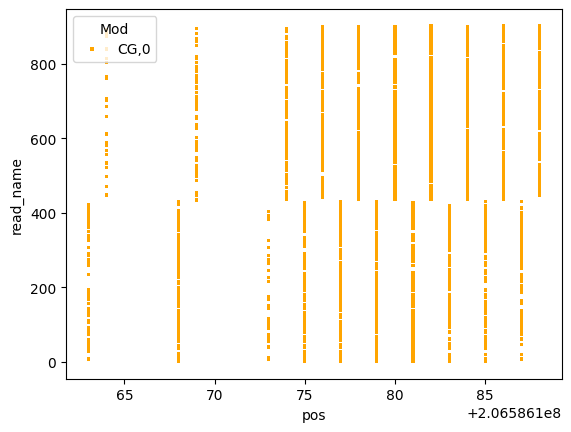

In [18]:
from matplotlib import pyplot as plt
from dimelo import plot_reads

plot_reads.plot_reads(
    extract_file, # extracted_h5,
    regions = 'chr1:206582520-206585020',
    motifs = ['CG,0'],
    thresh = 0.75,
    sort_by = ['shuffle','strand'],
    relative = False,
    window_size = None, # 5000,
    s=5,
)

AttributeError: 'Legend' object has no attribute 'legendHandles'

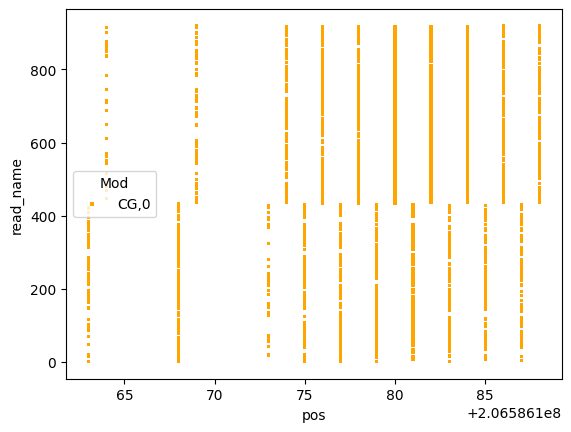

In [19]:
from matplotlib import pyplot as plt
from dimelo import plot_reads

plot_reads.plot_reads(
    extract_file, # extracted_h5,
    regions = 'chr1:206582520-206585020',
    motifs = ['CG,0'],
    thresh = 0.75,
    sort_by = ['shuffle','strand'],
    relative = False,
    window_size =  5000, # None, #
    s=5,
)

In [21]:
# chr1_
206586162-206586192


-30

In [22]:

# ref_genome_v1_1_file
window_size = 4000
outname = f'cd55_window{window_size}'
num_cores = 32

# cas9 = parse_bam.extract(
#     input_file=bam_cas9_12ef_101923_updated, # cd55_filepath,
#     output_name=outname,
#     ref_genome=ref_genome_v1_1_file, # '/clusterfs/nilah/oberon/genomes/chm13.draft_v1.1.fasta',
#     regions=t2t_cd55_30bps, # bed_files="chr1:206586162-206586192", # [bed_region],
#     basemods=['CG,0'],
#     cores=num_cores,
#     thresh=0.75,
#     window_size=window_size,
# )
t2t_cd55_30bps = 'chr1:206586162-206586192'

# = extract_file, extract_regions
cas9  = parse_bam.extract(
    input_file=bam_cas9_12ef_101923_updated, # ctcf_bam_file_updated
    output_name='cas9_12ef_101923_extract_chr1_206586162_206586192_ws4000_thresh075', # _ws4000 'ctcf_demo_extract',
    ref_genome=ref_genome_v1_1_file, # ref_genome_file,
    output_directory=output_dir,
    regions=t2t_cd55_30bps, # [cd55_interest_target_regions], # ctcf_target_regions,ctcf_off_target_regions],
    motifs=['CG,0'], # ['A,0','CG,0'],
    thresh=0.75, # 190,
    window_size=window_size, # None,
    # cores = 1, # uncomment this line if your process appears to be terminating early (reduces memory usage)
    # quiet = True,
    # cleanup = False,
    # log=True,
)

     


No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.75 will be treated as coming from range 0-1.


          | Preprocessing   0% | 00:00

          | Processing cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.updated.bam   0% | 00:00<?

          |    0%

          | Transferring 1047 from reads.CG,0.txt into reads.combined_basemods.h5, new size 1047   0% | 00:00<…

In [23]:
extract_file_ws4000, extract_regions_ws4000 = cas9
extract_file_ws4000


PosixPath('/home/michalula/code/epiCausality/K562/dimelo_new_output/cas9_12ef_101923_extract_chr1_206586162_206586192_ws4000_thresh075/reads.combined_basemods.h5')

AttributeError: 'Legend' object has no attribute 'legendHandles'

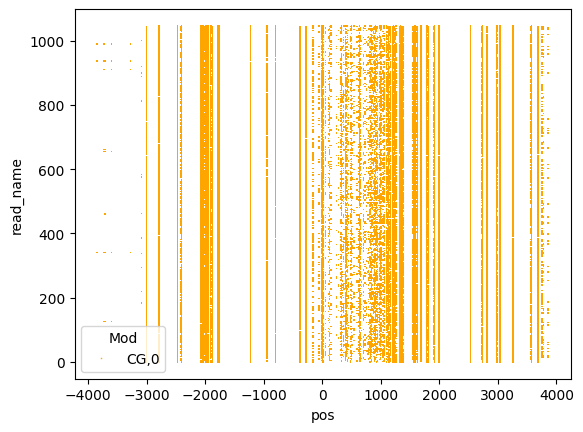

In [24]:
plot_reads.plot_reads(
    extract_file_ws4000, # cas9,
    "chr1:206586162-206586192", # bed_region,
    ['CG,0'],
    window_size = 4000,
    s=1)
plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
plt.title('cas9_12ef_101923_misha_mod_mappings.retagged.sorted_mC_only.bam CpG extraction')
     


AttributeError: 'Legend' object has no attribute 'legendHandles'

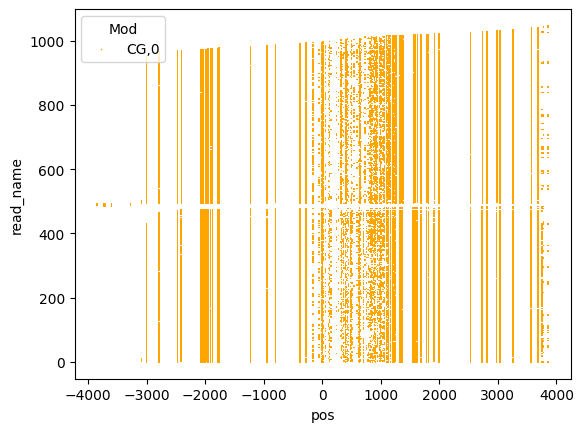

In [25]:
plot_reads.plot_reads(
    extract_file_ws4000, # cas9,
    "chr1:206586162-206586192", # bed_region,
    ['CG,0'],
    window_size = 4000,
    sort_by = ['strand'], # ['shuffle','strand'],
    # sort_by = ['shuffle', 'strand', 'region_start'], # ['shuffle','strand'],
    s=1)
plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
plt.title('cas9_12ef_101923_misha_mod_mappings.retagged.sorted_mC_only.bam CpG extraction')



# Sort reads by the region start

AttributeError: 'Legend' object has no attribute 'legendHandles'

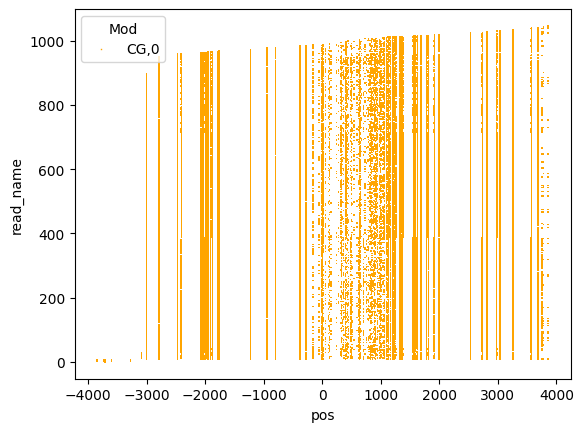

In [29]:
# Sort reads by the region start

plot_reads.plot_reads(
    extract_file_ws4000, # cas9,
    "chr1:206586162-206586192", # bed_region,
    ['CG,0'],
    window_size = 4000,
    sort_by = ['region_start'], # ['shuffle','strand'],
    # sort_by = ['shuffle', 'strand', 'region_start'], # ['shuffle','strand'],
    s=1)
# plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
# plt.title('cas9_12ef_101923_misha_mod_mappings.retagged.sorted_mC_only.bam CpG extraction')


AttributeError: 'Legend' object has no attribute 'legendHandles'

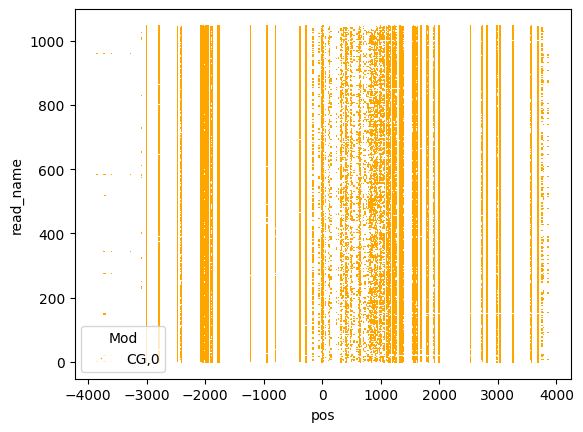

In [36]:
ax=plot_reads.plot_reads(
    extract_file_ws4000, # cas9,
    "chr1:206586162-206586192", # bed_region,
    ['CG,0'],
    window_size = 4000,
    sort_by = ['region_start', 'shuffle'], # ['shuffle','strand'],
    # sort_by = ['shuffle', 'strand', 'region_start'], # ['shuffle','strand'],
    s=1)
ax.get_legend() 
#only works after the legend was created. Try
leg = ax.legend()

plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
plt.title('cas9_12ef_101923_misha_mod_mappings.retagged.sorted_mC_only.bam CpG extraction')



AttributeError: 'Legend' object has no attribute 'legendHandles'

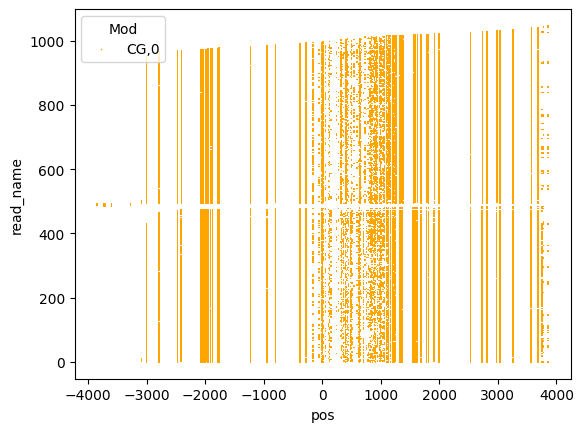

In [35]:
ax = plot_reads.plot_reads(
    extract_file_ws4000, # cas9,
    "chr1:206586162-206586192", # bed_region,
    ['CG,0'],
    window_size = 4000,
    sort_by = ['region_start', 'strand'], # ['shuffle','strand'],
    # sort_by = ['shuffle', 'strand', 'region_start'], # ['shuffle','strand'],
    s=1)
plt.xlabel('bp relative to CD55 differential methylated region (t2t v1.1 chr1:206586177)')
plt.title('cas9_12ef_101923_misha_mod_mappings.retagged.sorted_mC_only.bam CpG extraction')


AttributeError: 'Legend' object has no attribute 'legendHandles'

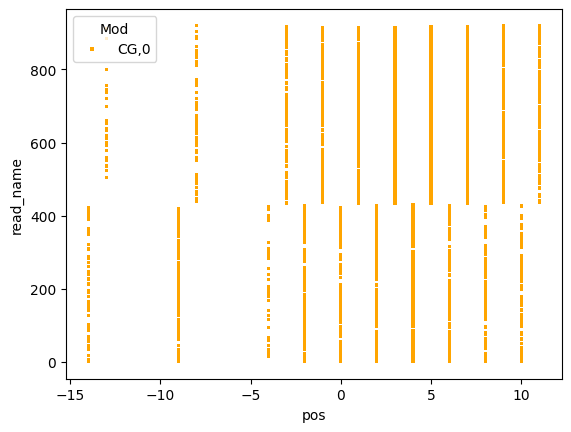

In [34]:
from matplotlib import pyplot as plt
from dimelo import plot_reads

fig, ax = plt.subplots()

ax = plot_reads.plot_reads(
    extract_file, # extracted_h5,
    regions = t2t_cd55_30bps, #'chr1:206582520-206585020',
    motifs = ['CG,0'],
    thresh = 0.75,
    sort_by = ['shuffle','strand'],
    # relative = False,
    relative = True,
    window_size = None, # 5000,
    s=5,
)
# plt.xlim(206582520,206585020)


seq = pysam.FastaFile(ref_genome_v1_1_file).fetch('chr1',206586162,206586192)
print(seq)
seq_list =  [s for s in seq]
plt.xticks(np.arange(len(seq_list)) - 15, seq_list, size='small')

AttributeError: 'Legend' object has no attribute 'legendHandles'

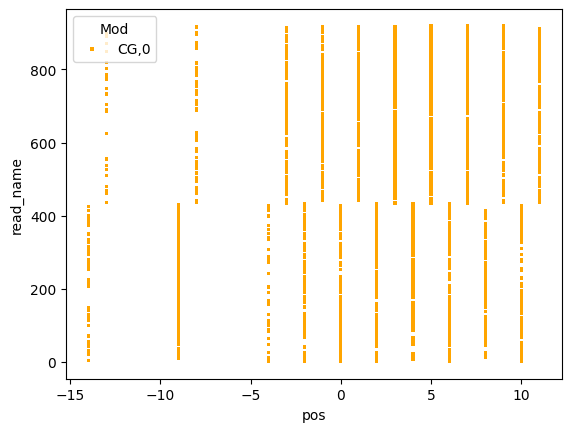

In [37]:
from matplotlib import pyplot as plt
from dimelo import plot_reads

fig, ax = plt.subplots()

ax = plot_reads.plot_reads(
    extract_file, # extracted_h5,
    regions = t2t_cd55_30bps, #'chr1:206582520-206585020',
    motifs = ['CG,0'],
    thresh = 0.75,
    sort_by = ['shuffle','strand'],
    # relative = False,
    relative = True,
    window_size = None, # 5000,
    s=5,
)
# plt.xlim(206582520,206585020)


seq = pysam.FastaFile(ref_genome_v1_1_file).fetch('chr1',206586162,206586192)
print(seq)
seq_list =  [s for s in seq]
plt.xticks(np.arange(len(seq_list)) - 15, seq_list, size='small')

AttributeError: 'Legend' object has no attribute 'legendHandles'

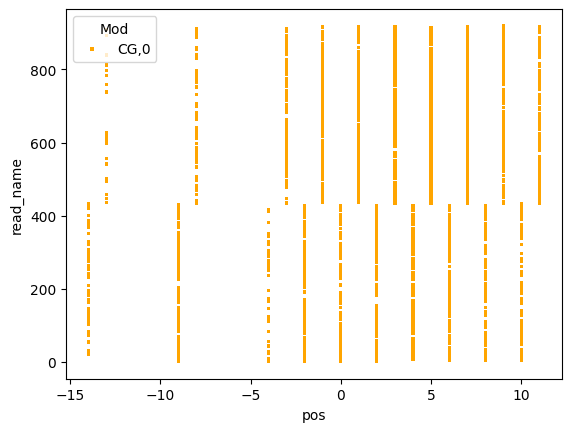

In [38]:

from matplotlib import pyplot as plt
from dimelo import plot_reads

fig, ax = plt.subplots()

ax = plot_reads.plot_reads(
    extract_file, # extracted_h5,
    regions = t2t_cd55_30bps, #'chr1:206582520-206585020',
    motifs = ['CG,0'],
    thresh = 0.75,
    sort_by = ['shuffle', 'strand'], # 'region_start'], # 'strand'], # 'shuffle',
    # relative = False,
    relative = True,
    window_size = None, # 5000,
    s=5,
)
# plt.xlim(206582520,206585020)


seq = pysam.FastaFile(ref_genome_v1_1_file).fetch('chr1',206586162,206586192)
print(seq)
seq_list =  [s for s in seq]
plt.xticks(np.arange(len(seq_list)) - 15, seq_list, size='small')

AttributeError: 'Legend' object has no attribute 'legendHandles'

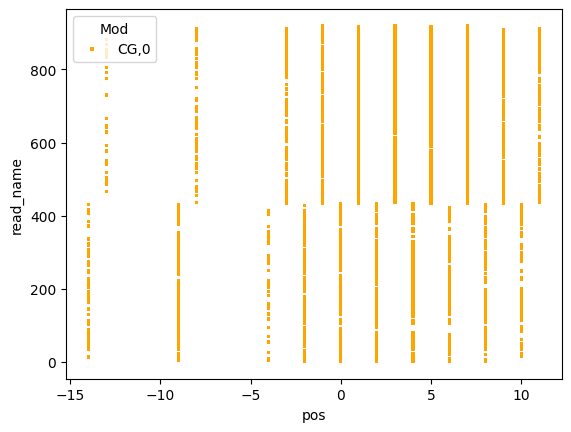

In [39]:
from matplotlib import pyplot as plt
from dimelo import plot_reads

fig, ax = plt.subplots()

ax = plot_reads.plot_reads(
    extract_file, # extracted_h5,
    regions = t2t_cd55_30bps, #'chr1:206582520-206585020',
    motifs = ['CG,0'],
    thresh = 0.75,
    sort_by = ['shuffle', 'strand', 'region_start'], # 'strand'], # 'shuffle',
    # relative = False,
    relative = True,
    window_size = None, # 5000,
    s=5,
)
# plt.xlim(206582520,206585020)


seq = pysam.FastaFile(ref_genome_v1_1_file).fetch('chr1',206586162,206586192)
print(seq)
seq_list =  [s for s in seq]
plt.xticks(np.arange(len(seq_list)) - 15, seq_list, size='small')

AttributeError: 'Legend' object has no attribute 'legendHandles'

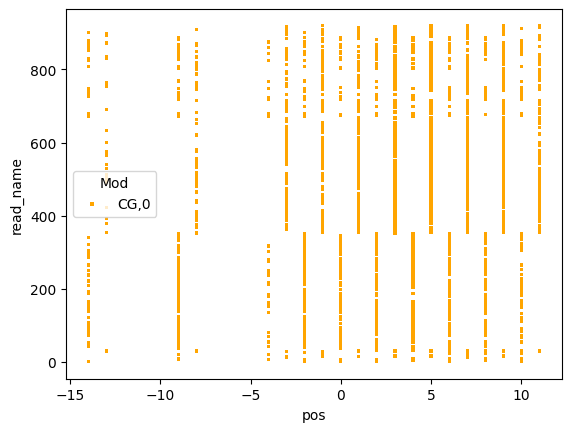

In [40]:
from matplotlib import pyplot as plt
from dimelo import plot_reads

fig, ax = plt.subplots()

ax = plot_reads.plot_reads(
    extract_file, # extracted_h5,
    regions = t2t_cd55_30bps, #'chr1:206582520-206585020',
    motifs = ['CG,0'],
    thresh = 0.75,
    sort_by = ['region_start'], # 'strand'], # 'shuffle',
    # relative = False,
    relative = True,
    window_size = None, # 5000,
    s=5,
)
# plt.xlim(206582520,206585020)


seq = pysam.FastaFile(ref_genome_v1_1_file).fetch('chr1',206586162,206586192)
print(seq)
seq_list =  [s for s in seq]
plt.xticks(np.arange(len(seq_list)) - 15, seq_list, size='small')
     

In [42]:
seq_list

NameError: name 'seq_list' is not defined